# Fuga de Empleados

## CONFIGURACIÓN DEL ENTORNO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### CARGA DE LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### CARGA DE LOS DATOS

In [ ]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [ ]:
df.head(5)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2


## BUSINESS ANALYTICS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

### ANÁLISIS DE NULOS

In [ ]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusiones:
  * anos_en_puesto y conciliacion tienen demasiados nulos -> Eliminar columnas
  * sexo, educacion, satisfaccion_trabajo, implicacion no hay tantos nulos -> imputarlos tras EDA

In [ ]:
df.drop(columns= ['anos_en_puesto','conciliacion'], inplace = True)
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'anos_compania',
       'anos_desde_ult_promocion', 'anos_con_manager_actual'],
      dtype='object')

### EDA VARIABLES CATEGÓRICAS

In [ ]:
def graficos_eda_categoricos(cat):
  from math import ceil

  # Calculamos el número de filas que necesitamos
  filas = ceil(cat.shape[1] /2)

  #Definimos el grafico
  f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas*6))

  # Aplicamos para iterar por el gráfico como si fuera de 1 dimension en lugar de 2
  ax = ax.flat

  # Creamos el bucle que va añadiendo gráficos
  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax= ax[cada])
    ax[cada].set_title(variable, fontsize= 12, fontweight= "bold")
    ax[cada].tick_params(labelsize= 12)

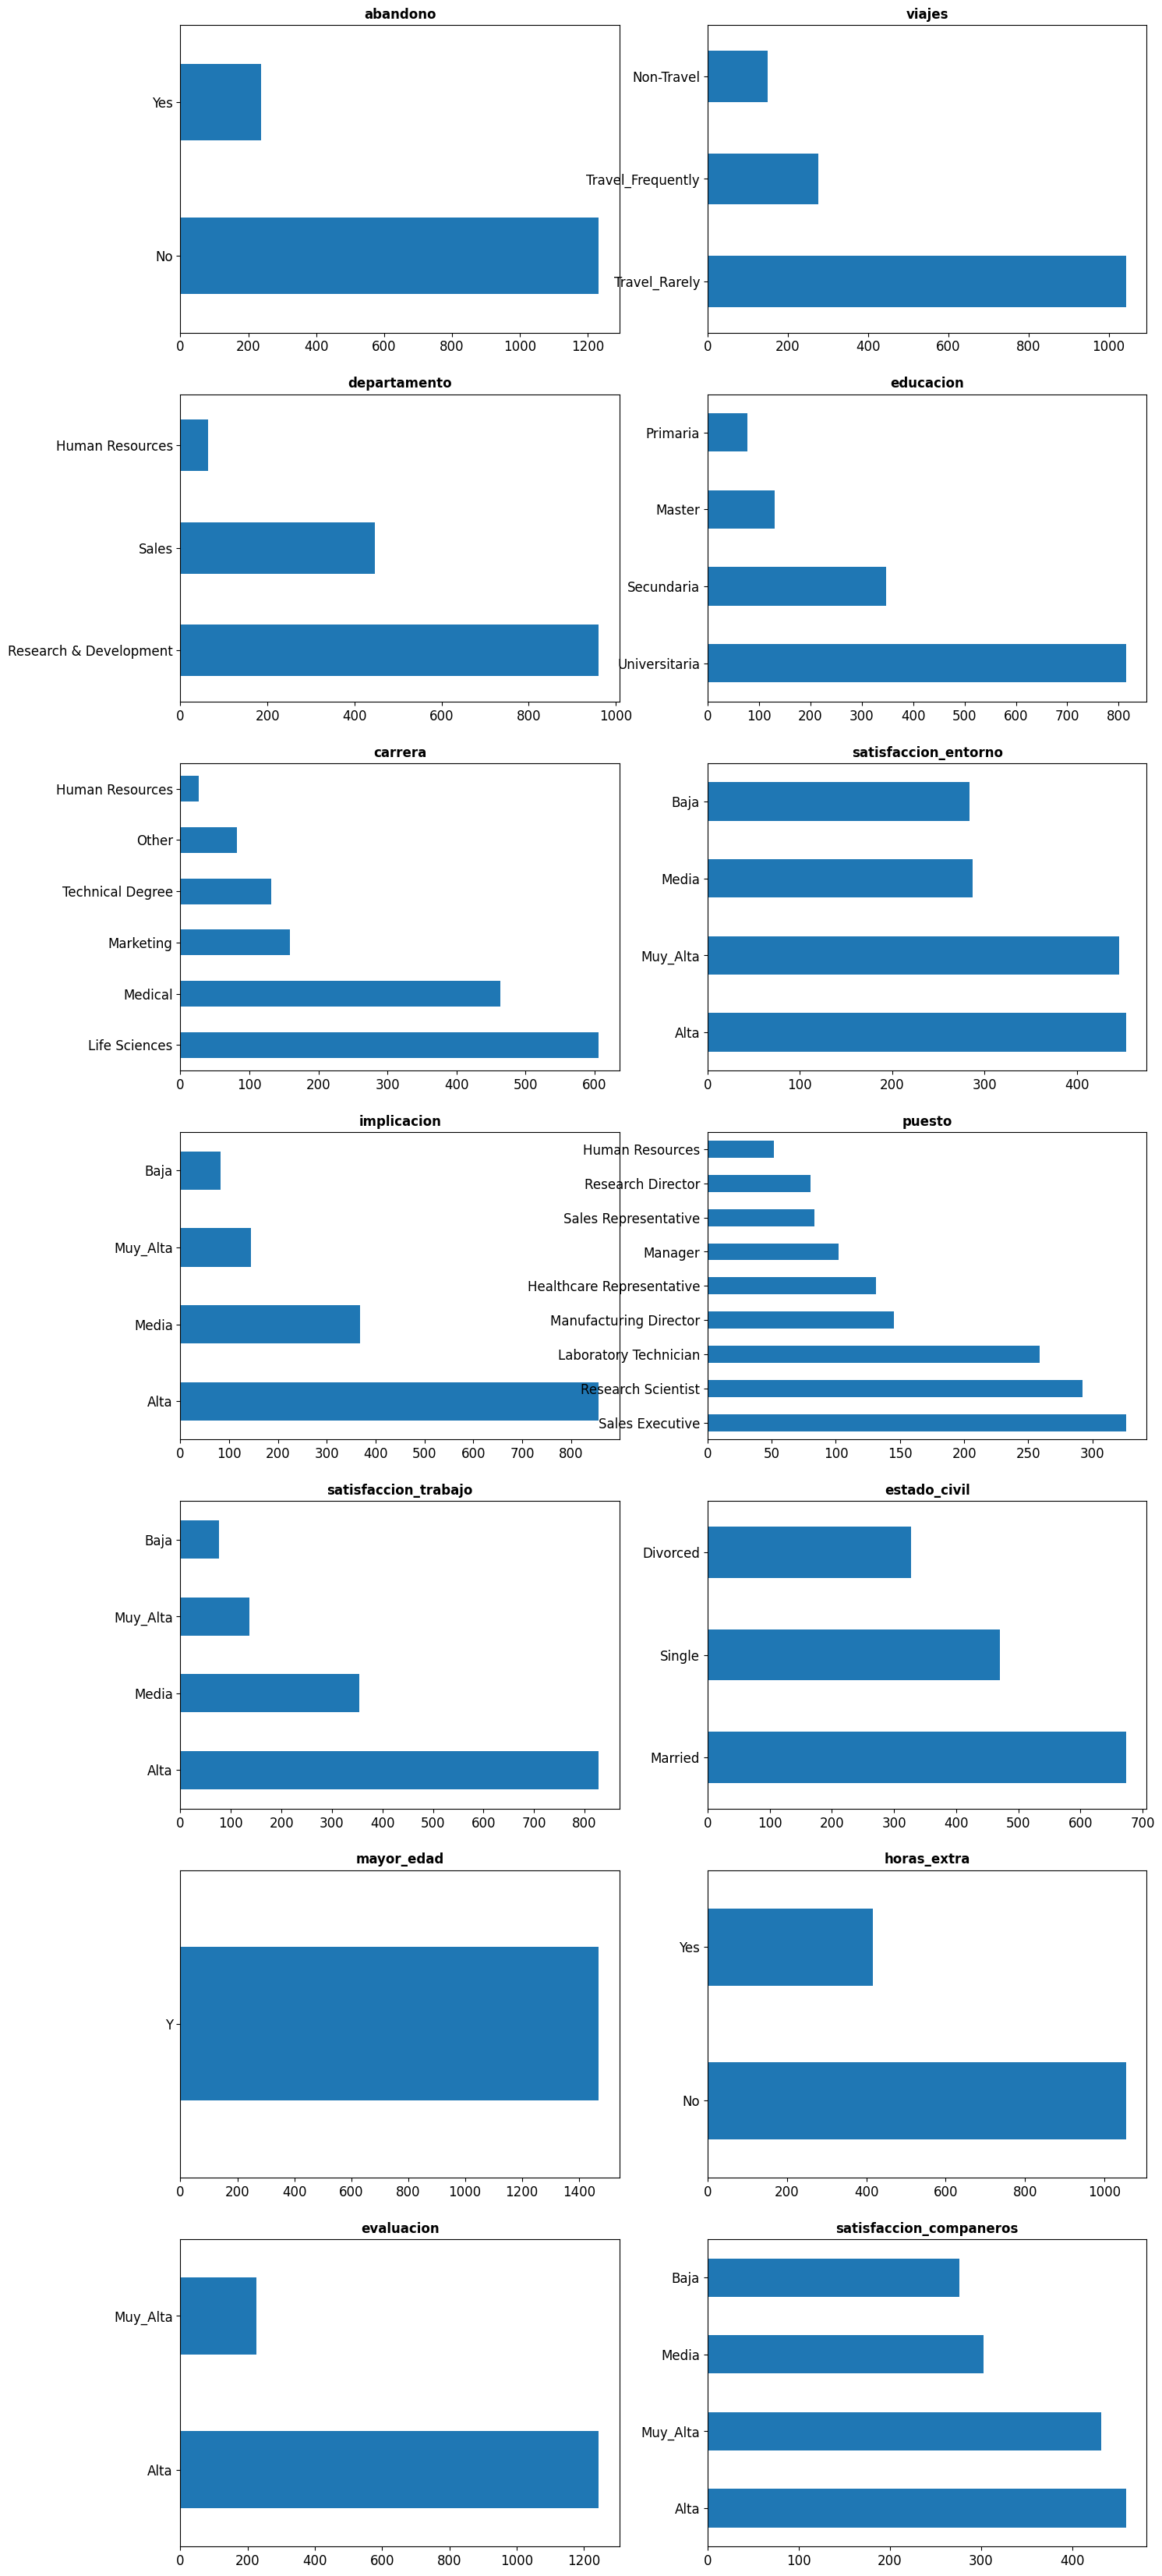

In [ ]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:
  * mayor_edad solo tiene un valor -> eliminar
  * Sobre las imputaciones pendientes de variables categoricas:
    * educacion: imputar por 'Universitaria'
    * satisfaccion_trabajo: imputar por 'Alta'
    * implicacion: imputar por 'Alta'

In [ ]:
df.drop(columns= 'mayor_edad', inplace = True)

# Eliminar
df['educacion'] = df['educacion'].fillna('Universitaria')

# Imputaciones
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

### EDA VARIABLES NUMÉRICAS

In [ ]:
def estadisticos_cont(num):
  # Calculamos describe
  estadisticos = num.describe().T

  # Añadimos la mediana
  estadisticos['median'] = num.median()

  # Reordenamos para que la mediana esté al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

  return estadisticos

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


In [ ]:
df['empleados'].unique()

array([1])

In [ ]:
df['sexo'].unique()

array([ 3.,  2.,  4., nan,  1.])

Conclusiones:
  * Variable empleados es una constante -> Eliminar
  * Variable sexo tiene 4 valores -> Eliminar
  * Variable horas_quincena solo tiene un valor -> Eliminar

In [ ]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)

### GENERACIÓN DE INSIGHTS

#### Cuantificación del problema: ¿Cuanto es la tasa de abandono?

In [ ]:
df.abandono.value_counts(normalize = True)*100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

#### ¿Hay un perfil tipo de empleado que deja la empresa?

In [ ]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No': 0, 'Yes': 1})

<Axes: xlabel='Educación'>

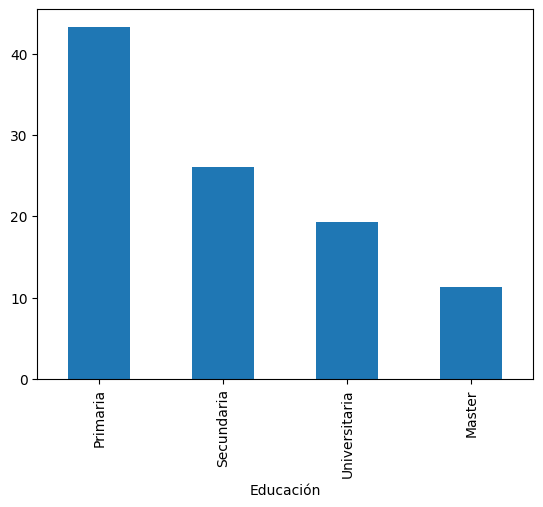

In [ ]:
# Analisis por educación
tmp = df.groupby('educacion').abandono.mean().sort_values(ascending = False)

# Normalizar porcentajes
tmp = (tmp / tmp.sum())*100

tmp.plot.bar(xlabel= "Educación")

<Axes: xlabel='Estado civil'>

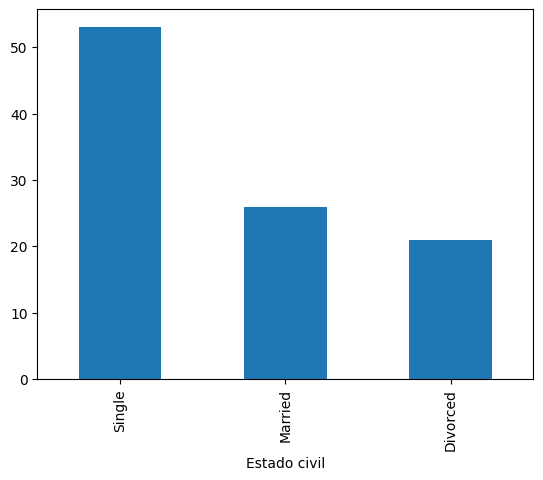

In [ ]:
# Analisis por estado civil
tmp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False)

# Normalizar porcentajes
tmp = (tmp / tmp.sum())*100

tmp.plot.bar(xlabel= "Estado civil")

<Axes: xlabel='Horas extra'>

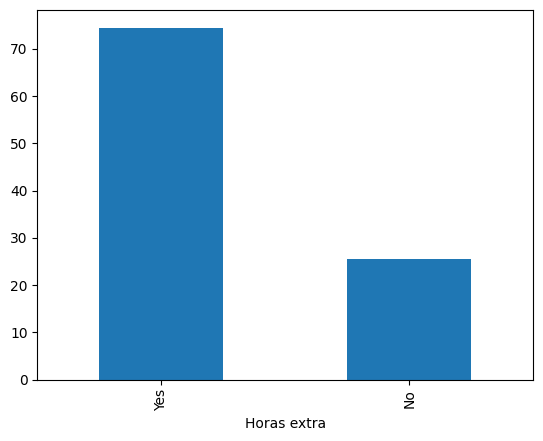

In [ ]:
# Analisis por horas extras
tmp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False)

# Normalizar porcentajes
tmp = (tmp / tmp.sum())*100

tmp.plot.bar(xlabel= "Horas extra")

<Axes: xlabel='Puesto'>

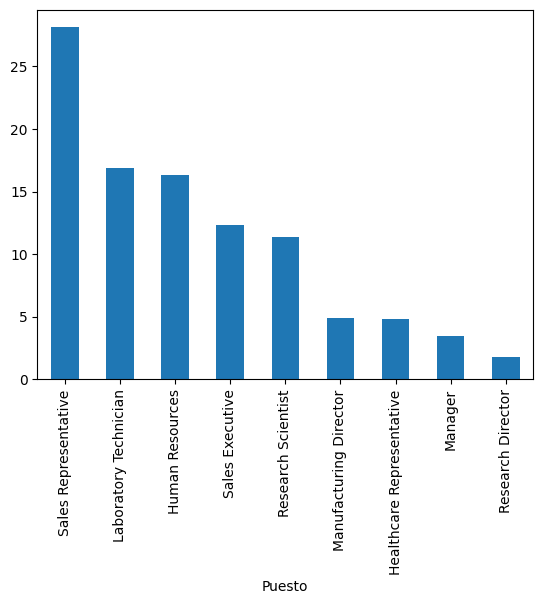

In [ ]:
# Analisis por puesto
tmp = df.groupby('puesto').abandono.mean().sort_values(ascending = False)

# Normalizar porcentajes
tmp = (tmp / tmp.sum())*100

tmp.plot.bar(xlabel= "Puesto")

<Axes: xlabel='Abandono'>

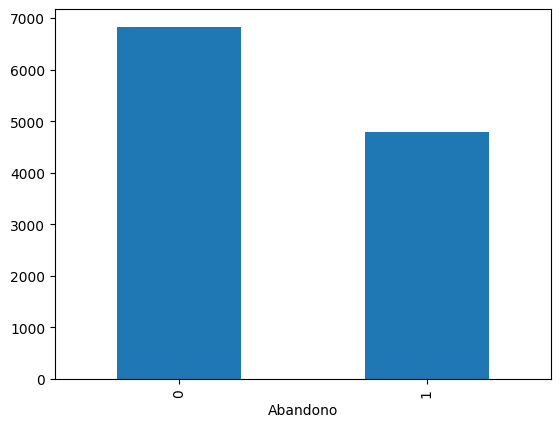

In [ ]:
tmp = df.groupby('abandono').salario_mes.mean()
tmp.plot.bar(xlabel = "Abandono")

Conclusiones:

El perfil medio del empleado que deja la empresa es:
  * Baja educación.
  * Soltero.
  * Trabaja en ventas.
  * Hace horas extras.
  * Salario bajo.
  

#### ¿Cual es el impacto económico de este problema?


Según el estudio "Cost of Tumover" del Center for American Progress:
  * El coste de la fuga de los empleados que ganan menos de 30000 es del 16.1% de su salario.
  * El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19.7% de su salario
  * El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20.4% de su salario
  * El coste de la fuga de los empleados que ganan mas de 75000 es del 21% de su salario.

In [ ]:
# Función encargada de calcular el coste de fuga de empleados según el "Center for American Progress"
def coste_fuga(sal):
  if sal < 30000:
    return sal*0.161
  elif sal > 30000 and sal < 50000:
    return sal*0.197
  elif sal > 50000 and sal < 75000:
    return sal*0.204
  else:
    return sal*0.21

In [ ]:
# Creamos una columna del salario anual (Para realizar el estudio)
df['salario_anual'] = df['salario_mes']*12
df[['salario_mes','salario_anual']]

,salario_mes,salario_anual
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [ ]:
# Calculamos el coste de fuga
df['coste_fuga'] =  df.salario_anual.transform(lambda x: coste_fuga(x))

#### ¿Cuánto nos ha costado el problema este ultimo año?

In [ ]:
coste_total = df[df['abandono'] == 1]['coste_fuga'].sum()
print(f"{round(coste_total, 2)}$")

2719005.91$


#### ¿Cuánto nos cuesta que los empleados no estén motivados? (Pérdidas en implicación == Baja)


In [ ]:
res = df[(df['abandono'] == 1) & (df['implicacion'] == "Baja")]['coste_fuga'].sum()
print(f"{round(res, 2)}$")

368672.69$


#### ¿Cuánto dinero podriamos ahorrar si fidelizamos al empleado?

In [ ]:
print(f"Reducir un 10% la fuga de empleados nos ahorraria {int(coste_total * 0.1)}$ al año")
print(f"Reducir un 20% la fuga de empleados nos ahorraria {int(coste_total * 0.2)}$ al año")
print(f"Reducir un 30% la fuga de empleados nos ahorraria {int(coste_total * 0.3)}$ al año")

Reducir un 10% la fuga de empleados nos ahorraria 271900$ al año
Reducir un 20% la fuga de empleados nos ahorraria 543801$ al año
Reducir un 30% la fuga de empleados nos ahorraria 815701$ al año


#### Seguir trazando estarategias asociadas a los insights de abandono

Los representante de ventas los representantes de ventas son los que mas se van.

¿Tendría sentido hacer un plan especifico para ellos?¿Cual seria el coste ahorrado si disminuimos la fuga un 30%?

Calcularemos el % de representante de ventas que se han ido el año pasado.

In [ ]:
total_repre_pasado = len(df[df['puesto'] == 'Sales Representative'])
abandono_repre_pasado = len(df[(df['puesto'] == 'Sales Representative') & (df['abandono'] == 1)])

proc_pasado = (abandono_repre_pasado / total_repre_pasado)

print(f"Representantes de ventas que se fugaron el año pasado: {round(proc_pasado * 100, 2)}%")

Representantes de ventas que se fugaron el año pasado: 39.76%


Estimación de cuanto se iran este año (En base al % de abandono del año pasado)

In [ ]:
total_repre_actual = len(df[(df['puesto'] == 'Sales Representative') & (df['abandono'] == 0)])
se_iran = int(total_repre_actual * proc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [ ]:
retenemos = int(se_iran * 0.3)

print(f"Retenemos: {retenemos}")

ahorrar = df[(df['puesto'] == 'Sales Representative') & (df['abandono'] == 0)]['coste_fuga'].sum() * proc_pasado * 0.3

print(f"La empresa puede llegar a ahorrar {round(ahorrar, 2)}$")

Retenemos: 5
La empresa puede llegar a ahorrar 37447.22$


## MACHINE LEARNING

In [ ]:
df_ml = df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

### PREPARACIÓN DE LOS DATOS PARA LA MODELALIZACIÓN

#### Transformar todas las variables categoricas a númericas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Categoricas
cat = df_ml.select_dtypes('O')

# Instanciamos
ohe = OneHotEncoder(sparse = False)

# Entrenamos
ohe.fit(cat)

# Aplicamos
cat_ohe = ohe.transform(cat)

# Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

cat_ohe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Extraemos las varaiables numericas del df
num = df.select_dtypes('number').reset_index(drop = True)

# Unimos variables numericas con variables categoricas con codificación one hot encoding
df_ml = pd.concat([cat_ohe, num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,coste_fuga
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### DISEÑO DE LA MODELIZACIÓN

#### Separación predictoras y target

In [ ]:
x = df_ml.drop(columns= 'abandono')
y = df_ml['abandono']

#### Separación train y test

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

### ENTRENAMIENTO DEL MODELO (ARBOL DE DECISIÓN)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar
ac = DecisionTreeClassifier(max_depth = 4)

# Entrenar
ac.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [ ]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.36170213, 0.46153846, 0.05245347, 0.83870968, 0.05245347,
       0.33333333, 0.05245347, 0.05245347, 0.05245347, 0.05245347,
       0.05245347, 0.05245347, 1.        , 0.07894737, 0.46153846,
       0.05245347, 0.31111111, 0.41666667, 0.31111111, 0.46153846])

In [ ]:
from sklearn.metrics import roc_auc_score

# Evaluación
roc_auc_score(test_y, pred)

0.7133903133903133

### INTERPRETACIÓN


#### Diagrama de árbol

[Text(0.5267857142857143, 0.9, 'node #0\nhoras_extra_No <= 0.5\nsamples = 100.0%\nvalue = [0.85, 0.15]'),
 Text(0.2857142857142857, 0.7, 'node #1\nsalario_mes <= 3751.5\nsamples = 27.6%\nvalue = [0.71, 0.29]'),
 Text(0.14285714285714285, 0.5, 'node #2\nedad <= 32.5\nsamples = 9.1%\nvalue = [0.46, 0.54]'),
 Text(0.07142857142857142, 0.3, 'node #3\npuesto_Research Scientist <= 0.5\nsamples = 4.8%\nvalue = [0.33, 0.67]'),
 Text(0.03571428571428571, 0.1, 'node #4\nsamples = 2.6%\nvalue = [0.16, 0.84]'),
 Text(0.10714285714285714, 0.1, 'node #5\nsamples = 2.2%\nvalue = [0.54, 0.46]'),
 Text(0.21428571428571427, 0.3, 'node #6\nnum_empresas_anteriores <= 8.5\nsamples = 4.3%\nvalue = [0.6, 0.4]'),
 Text(0.17857142857142858, 0.1, 'node #7\nsamples = 4.0%\nvalue = [0.64, 0.36]'),
 Text(0.25, 0.1, 'node #8\nsamples = 0.3%\nvalue = [0.0, 1.0]'),
 Text(0.42857142857142855, 0.5, 'node #9\ncarrera_Marketing <= 0.5\nsamples = 18.5%\nvalue = [0.83, 0.17]'),
 Text(0.35714285714285715, 0.3, 'node #10\nsa

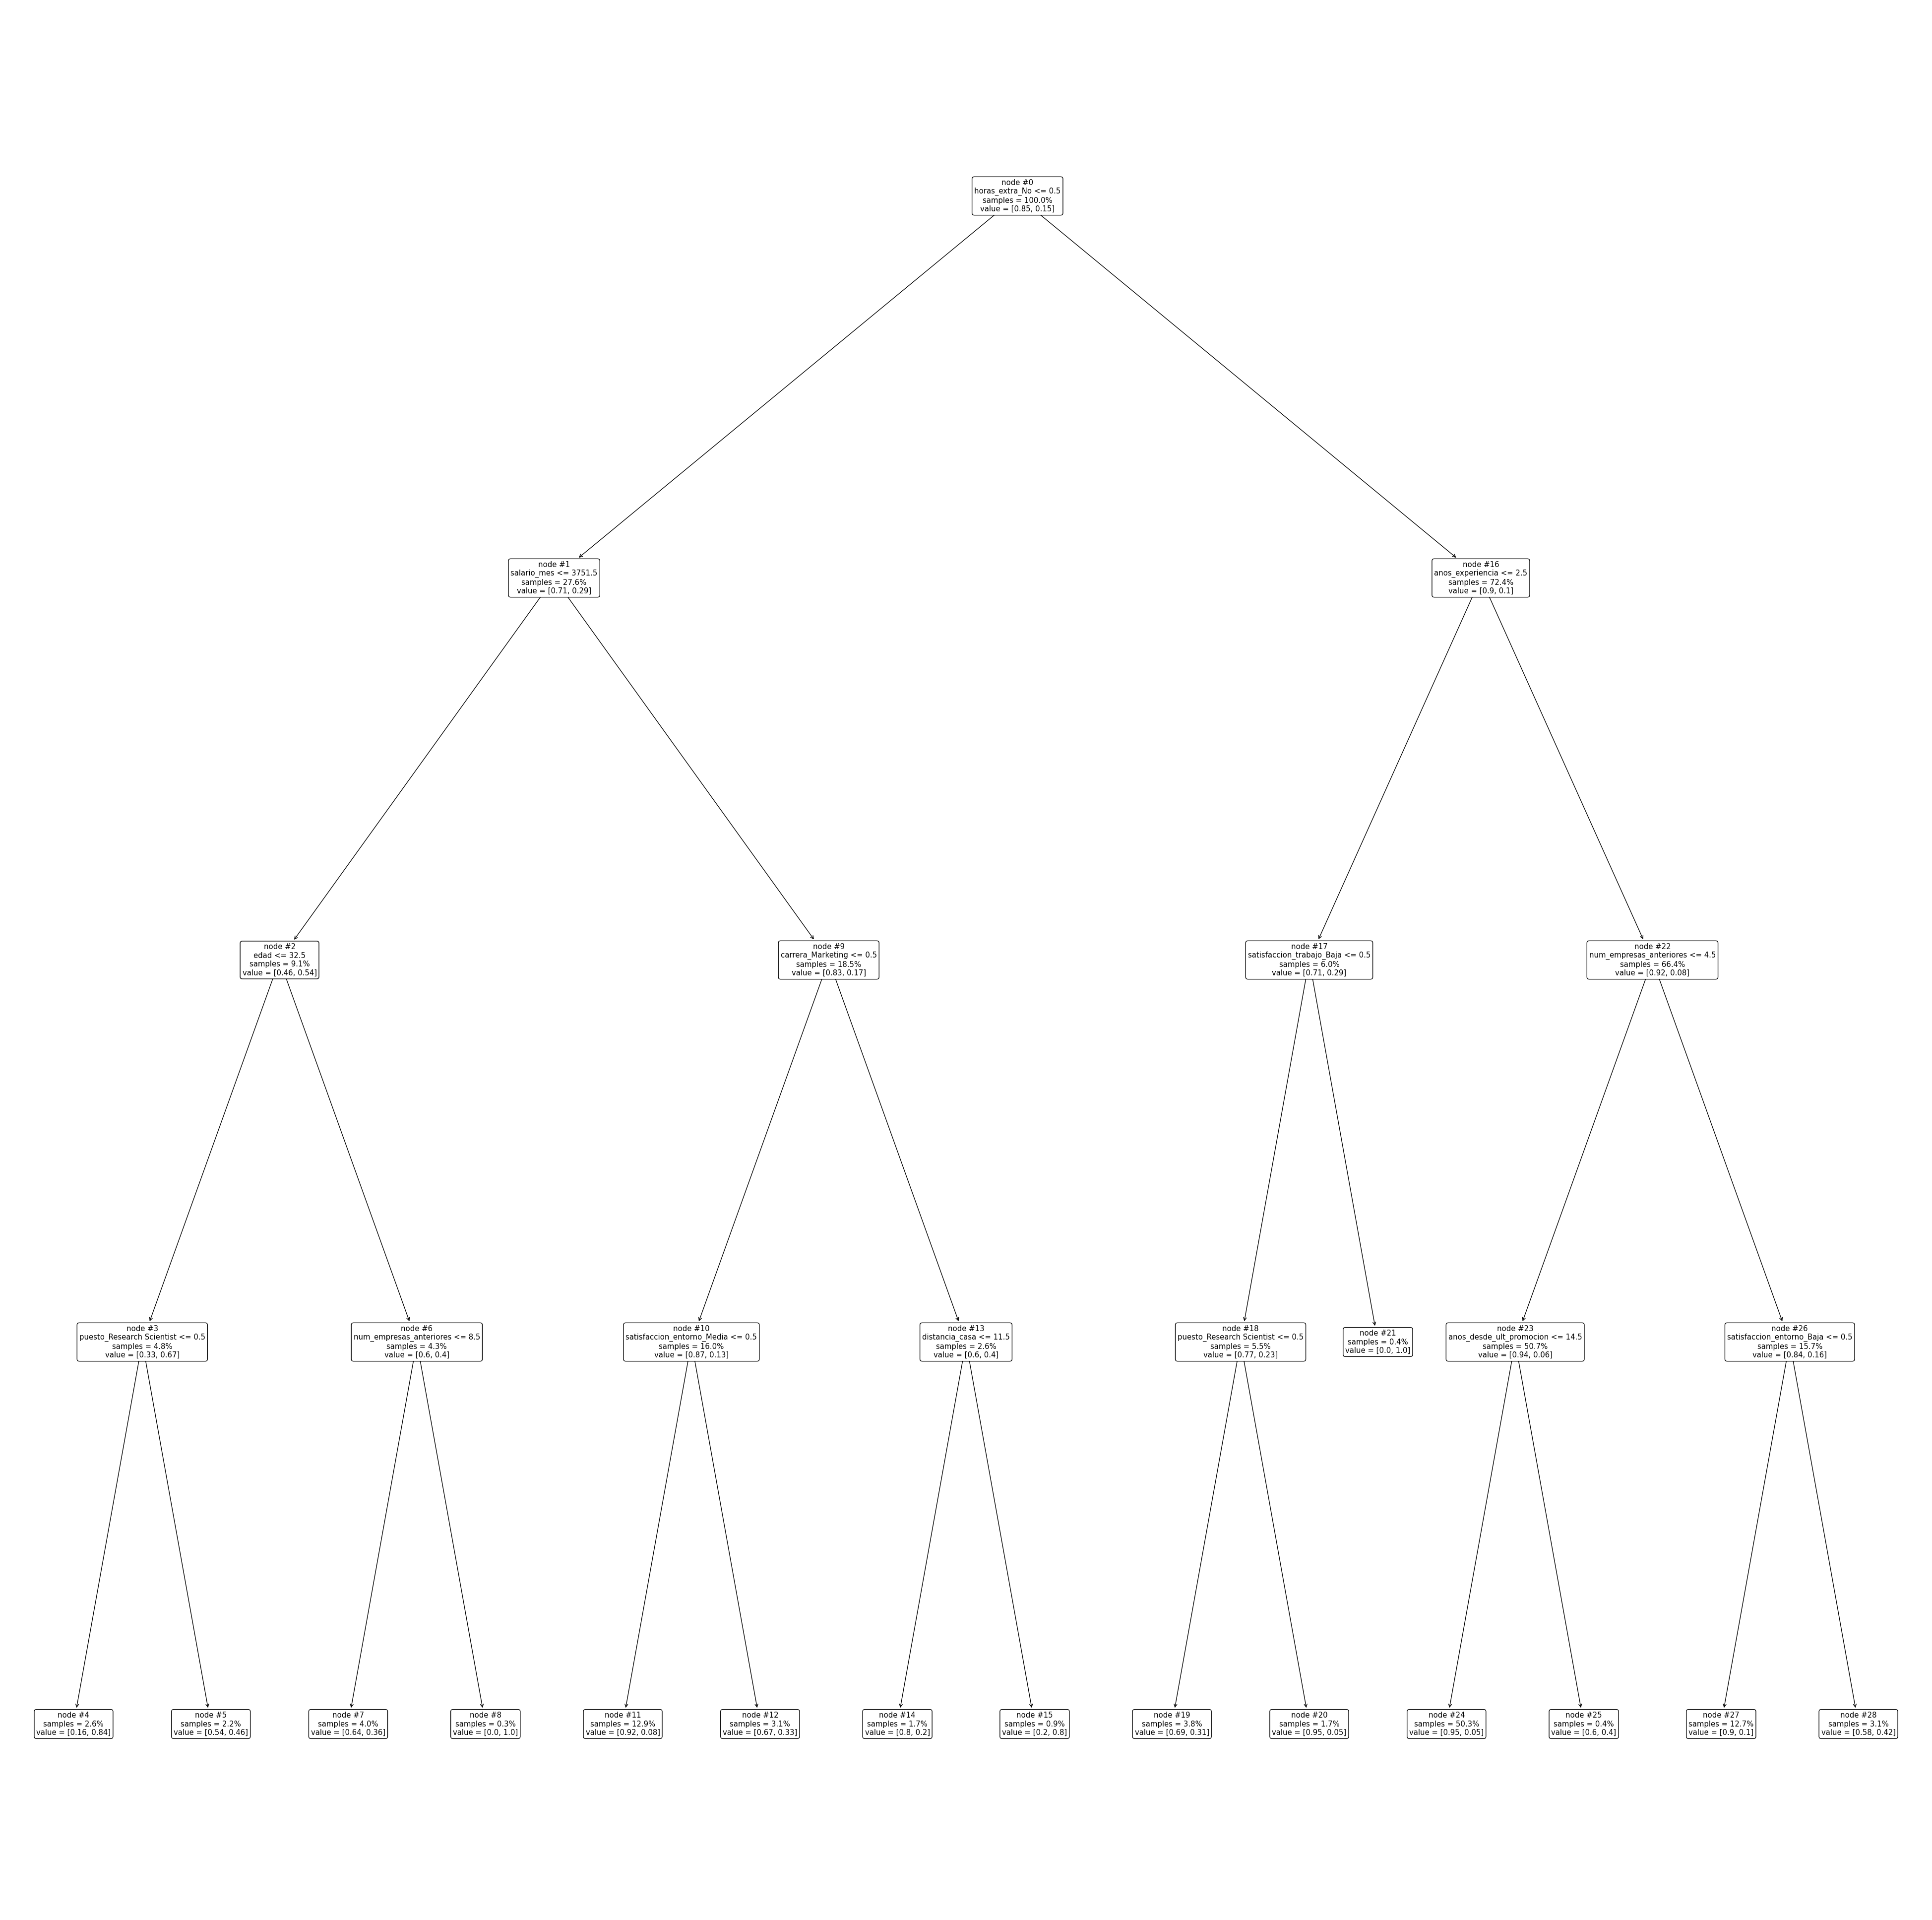

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names = test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2)

#### Importancia de las variables

<Axes: >

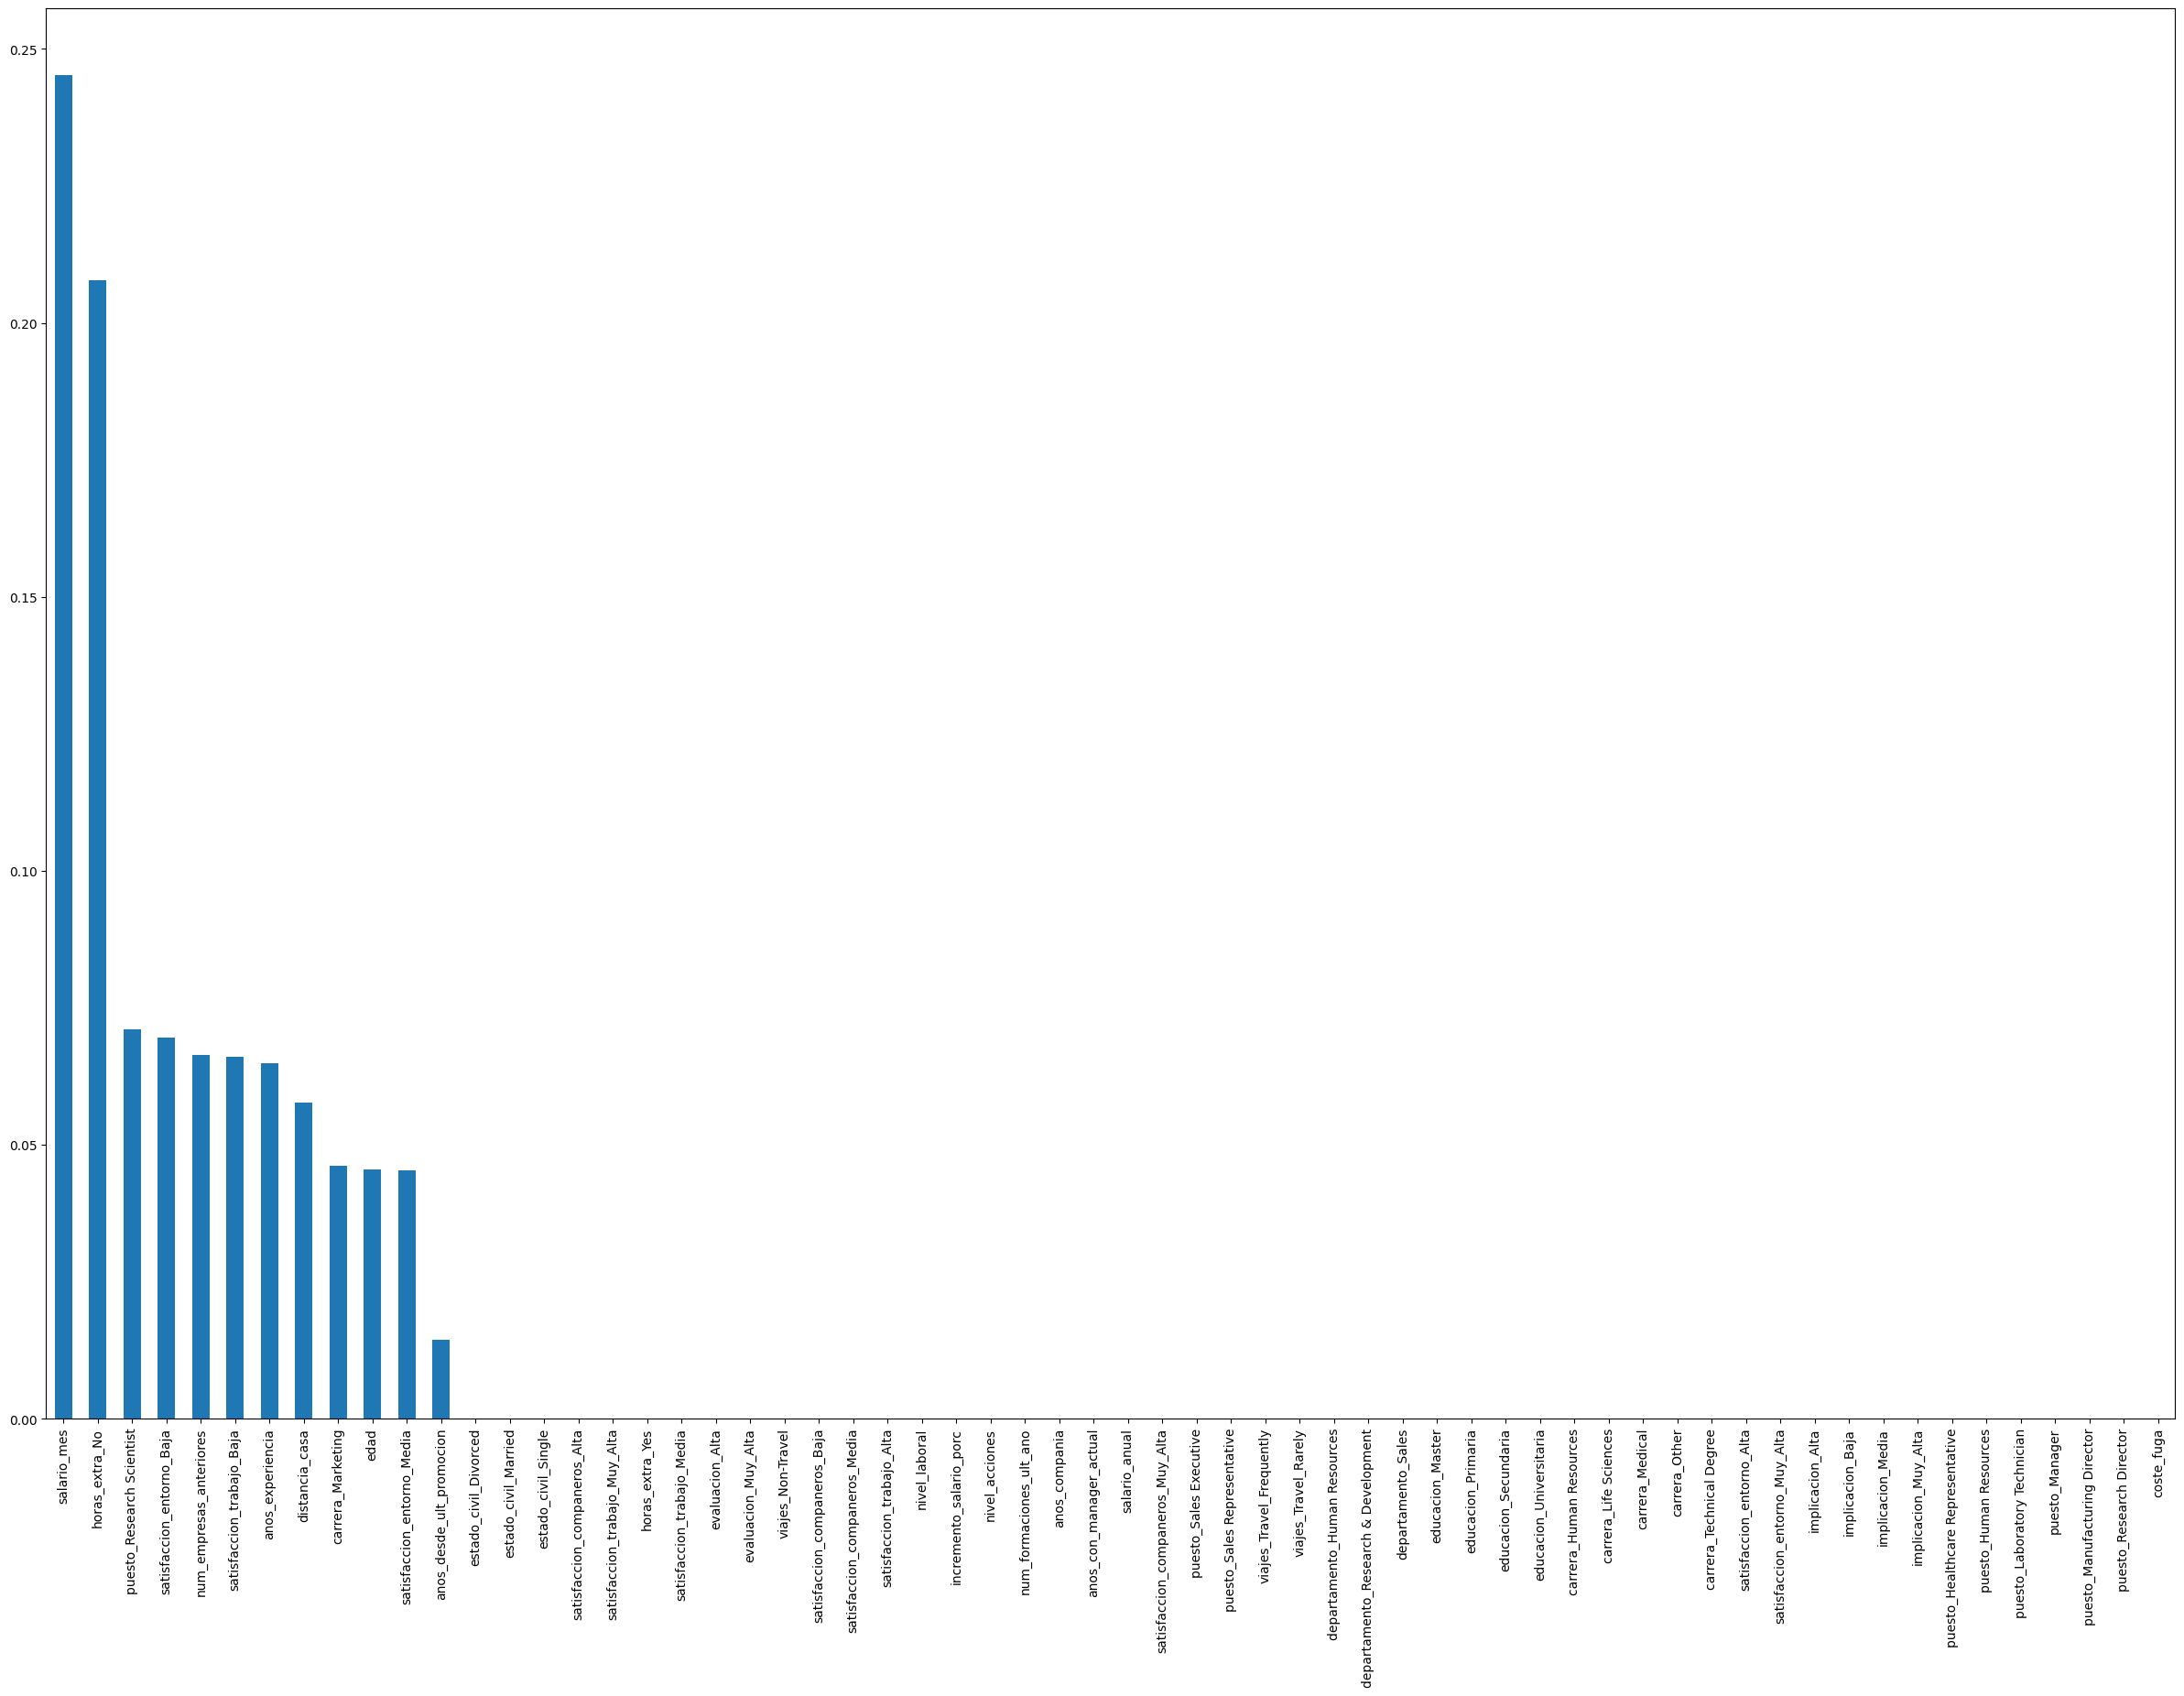

In [ ]:
pd.Series(ac.feature_importances_, index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20))

### EXPLOTACIÓN

Incorporación del scoring al dataframe principal

In [ ]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,coste_fuga,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.333333
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.052453
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.361702
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.361702
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.052453
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.052453
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.333333


In [ ]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,coste_fuga,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
51,36,0,Travel_Rarely,Research & Development,5,Secundaria,Life Sciences,Media,Media,1,...,Muy_Alta,1,6,3,1,0,0,41028,8082.516,1.00000
235,19,1,Travel_Frequently,Sales,1,Primaria,Technical Degree,Alta,Baja,1,...,Baja,0,1,5,0,0,0,27900,4491.900,1.00000
55,26,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,Baja,1,...,Alta,0,1,2,1,0,1,27516,4430.076,1.00000
1427,31,1,Travel_Frequently,Sales,1,Primaria,Life Sciences,Media,Baja,1,...,Media,0,1,3,1,0,0,16308,2625.588,1.00000
918,58,1,Travel_Frequently,Research & Development,2,Secundaria,Life Sciences,Muy_Alta,Media,1,...,Muy_Alta,1,3,3,1,0,0,28560,4598.160,1.00000
1714,24,1,Travel_Rarely,Human Resources,22,Primaria,Human Resources,Muy_Alta,Baja,1,...,Alta,1,1,2,1,0,0,18660,3004.260,1.00000
1752,29,1,Travel_Rarely,Sales,9,Primaria,Marketing,Media,Baja,1,...,Alta,0,2,3,2,2,2,33120,6524.640,1.00000
1767,43,1,Travel_Frequently,Research & Development,17,Universitaria,Technical Degree,Alta,Media,1,...,Muy_Alta,1,6,4,1,0,0,29244,4708.284,1.00000
1081,51,1,Travel_Rarely,Research & Development,4,Universitaria,Life Sciences,Baja,Alta,1,...,Alta,3,18,2,10,2,7,29532,4754.652,1.00000


Riesgo de dejar la empresa por puesto de trabajo

<Axes: title={'center': 'scoring_abandono'}, xlabel='puesto'>

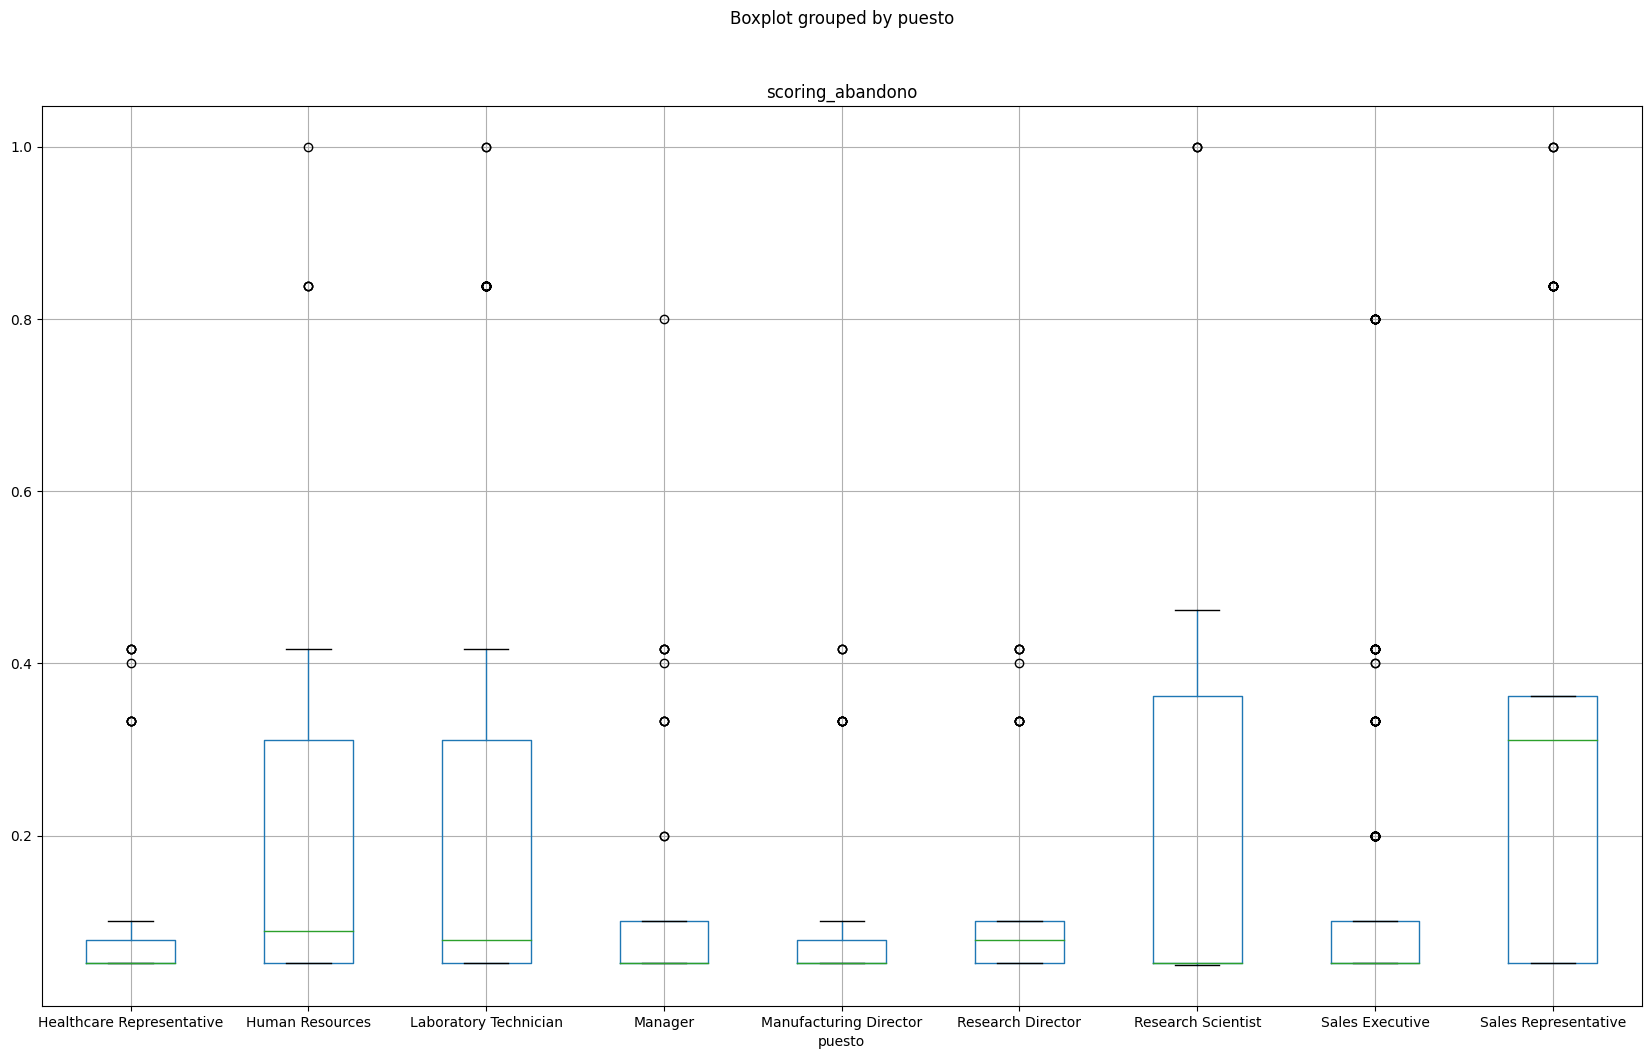

In [ ]:
df.boxplot(column='scoring_abandono', by= 'puesto', figsize= (20,12))

### GUARDAR EL RESULTADO

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,coste_fuga,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.333333
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.052453
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.361702
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.361702
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.052453
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.052453
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.333333


In [ ]:
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')

"from google.colab import files\n\ndf.to_excel('abandono_con_scoring.xlsx')\nfiles.download('abandono_con_scoring.xlsx')"